In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir('/Users/stevengeorge/Documents/Github/fpl-analysis/')

__TODO: Rename gw DataFrame to gw2 or generic name__ 

In [2]:
gw1_v1_player_predictions = pd.read_parquet(r'data/gw_predictions/gw16_v2_lstm_player_predictions.parquet')
print(gw1_v1_player_predictions.shape)
gw1_v1_player_predictions.head()

(549, 13)


,name,GW_plus_1,GW_plus_2,GW_plus_3,GW_plus_4,GW_plus_5,position_DEF,position_FWD,position_GK,position_MID,team_name,next_match_value,sum
0,kevin_de bruyne,5.267617,5.076207,5.068204,4.990434,4.831463,0,0,0,1,Manchester City,10.3,25.233924
1,sadio_mané,5.157949,4.955839,4.939997,4.857856,4.702377,0,0,0,1,Liverpool,12.3,24.614018
2,raheem_sterling,5.010264,4.829712,4.822919,4.749531,4.598156,0,0,0,1,Manchester City,11.9,24.010582
3,jamie_vardy,4.583392,4.411679,4.402038,4.332379,4.193875,0,1,0,0,Leicester City,10.0,21.923364
4,heung-min_son,4.474289,4.292636,4.275721,4.201514,4.067049,0,0,0,1,Tottenham Hotspur,9.8,21.311209


In [3]:
gw1_v1_player_predictions.rename(columns={'sum': 'predictions'}, inplace=True)

In [4]:
plot_df = pd.melt(gw1_v1_player_predictions[['name', 'GW_plus_1', 'GW_plus_2', 'GW_plus_3', 'GW_plus_4', 'GW_plus_5']], id_vars=['name'])
plot_df.rename(columns={'variable': 'GW', 'value': 'prediction'}, inplace=True)
plot_df.head()

,name,GW,prediction
0,kevin_de bruyne,GW_plus_1,5.267617
1,sadio_mané,GW_plus_1,5.157949
2,raheem_sterling,GW_plus_1,5.010264
3,jamie_vardy,GW_plus_1,4.583392
4,heung-min_son,GW_plus_1,4.474289


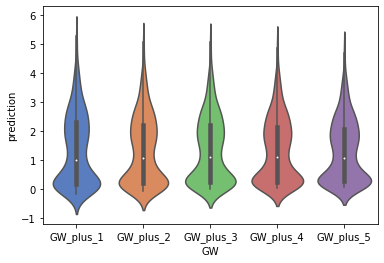

In [5]:
sns.violinplot(x="GW", y="prediction", data=plot_df, palette="muted", split=True)

In [6]:
gw1_v1_player_predictions['name'] = gw1_v1_player_predictions['name'].str.replace(' ', '_')
gw1_v1_player_predictions['name'] = gw1_v1_player_predictions['name'].str.replace('-', '_')

In [7]:
gw15_team_selection = pd.read_parquet('data/gw_team_selections/gw15_v2_lstm_team_selections.parquet')
gw15_team_selection['in_current_team'] = 1
gw15_team_selection

,name,GW_plus_1,GW_plus_2,GW_plus_3,GW_plus_4,GW_plus_5,position_DEF,position_FWD,position_GK,position_MID,...,team_name_Newcastle United,team_name_Norwich,team_name_Sheffield Utd,team_name_Southampton,team_name_Tottenham Hotspur,team_name_Watford,team_name_West Ham United,team_name_Wolverhampton Wanderers,starting_11,in_current_team
0,kevin_de_bruyne,5.253720,5.054800,5.042359,4.961340,4.802997,0,0,0,1,...,0,0,0,0,0,0,0,0,1.0,1
1,raheem_sterling,5.025365,4.843449,4.836023,4.762089,4.610271,0,0,0,1,...,0,0,0,0,0,0,0,0,1.0,1
2,jamie_vardy,4.623189,4.434488,4.416426,4.339687,4.200589,0,1,0,0,...,0,0,0,0,0,0,0,0,1.0,1
3,mason_mount,3.933991,3.799482,3.798442,3.743004,3.623947,0,0,0,1,...,0,0,0,0,0,0,0,0,1.0,1
4,virgil_van_dijk,3.845130,3.696792,3.686366,3.625572,3.510041,1,0,0,0,...,0,0,0,0,0,0,0,0,1.0,1
5,raúl_jiménez,3.859165,3.695408,3.677166,3.610413,3.494913,0,1,0,0,...,0,0,0,0,0,0,0,1,1.0,1
6,andrew_robertson,3.782500,3.652443,3.651373,3.598150,3.483642,1,0,0,0,...,0,0,0,0,0,0,0,0,1.0,1
7,john_lundstram,3.677043,3.534448,3.524795,3.466269,3.355937,1,0,0,0,...,0,0,1,0,0,0,0,0,1.0,1
8,mathew_ryan,3.504287,3.367211,3.357355,3.300998,3.196113,0,0,1,0,...,0,0,0,0,0,0,0,0,1.0,1
9,john_mcginn,3.323607,3.201149,3.195814,3.145273,3.045775,0,0,0,1,...,0,0,0,0,0,0,0,0,1.0,1


In [8]:
gw1_team = list(gw15_team_selection['name'])
gw1_team

['kevin_de_bruyne',
 'raheem_sterling',
 'jamie_vardy',
 'mason_mount',
 'virgil_van_dijk',
 'raúl_jiménez',
 'andrew_robertson',
 'john_lundstram',
 'mathew_ryan',
 'john_mcginn',
 'todd_cantwell',
 'danny_ings',
 'lewis_dunk',
 'diego_rico',
 'david_button']

In [9]:
len(gw1_team)

15

In [10]:
gw1_team_df = pd.DataFrame(
    {
        'name': gw1_team
    }
)
gw1_team_df['in_gw_1_team'] = 1

# Need to format here given that this was done at points prediction stage
gw1_team_df['name'] = gw1_team_df['name'].str.replace(' ', '_')
gw1_team_df['name'] = gw1_team_df['name'].str.replace('-', '_')

gw1_team_df

,name,in_gw_1_team
0,kevin_de_bruyne,1
1,raheem_sterling,1
2,jamie_vardy,1
3,mason_mount,1
4,virgil_van_dijk,1
5,raúl_jiménez,1
6,andrew_robertson,1
7,john_lundstram,1
8,mathew_ryan,1
9,john_mcginn,1


In [11]:
gw1_v1_player_predictions = gw1_v1_player_predictions.merge(gw1_team_df, on='name', how='left')
gw1_v1_player_predictions['in_gw_1_team'] = gw1_v1_player_predictions['in_gw_1_team'].fillna(0)
gw1_v1_player_predictions.head()

,name,GW_plus_1,GW_plus_2,GW_plus_3,GW_plus_4,GW_plus_5,position_DEF,position_FWD,position_GK,position_MID,team_name,next_match_value,predictions,in_gw_1_team
0,kevin_de_bruyne,5.267617,5.076207,5.068204,4.990434,4.831463,0,0,0,1,Manchester City,10.3,25.233924,1.0
1,sadio_mané,5.157949,4.955839,4.939997,4.857856,4.702377,0,0,0,1,Liverpool,12.3,24.614018,0.0
2,raheem_sterling,5.010264,4.829712,4.822919,4.749531,4.598156,0,0,0,1,Manchester City,11.9,24.010582,1.0
3,jamie_vardy,4.583392,4.411679,4.402038,4.332379,4.193875,0,1,0,0,Leicester City,10.0,21.923364,1.0
4,heung_min_son,4.474289,4.292636,4.275721,4.201514,4.067049,0,0,0,1,Tottenham Hotspur,9.8,21.311209,0.0


In [12]:
gw1_v1_player_predictions[gw1_v1_player_predictions['in_gw_1_team'] == 1][['name', 'next_match_value']]

,name,next_match_value
0,kevin_de_bruyne,10.3
2,raheem_sterling,11.9
3,jamie_vardy,10.0
13,mason_mount,6.6
15,raúl_jiménez,7.7
16,virgil_van_dijk,6.4
18,andrew_robertson,7.1
20,john_lundstram,5.1
26,mathew_ryan,4.8
33,danny_ings,6.2


In [13]:
# Override values which are incorrect for current players:
#gw1_v1_player_predictions.loc[gw1_v1_player_predictions['name'] == 'kevin_de_bruyne', 'next_match_value'] = 10.1
#gw1_v1_player_predictions.loc[gw1_v1_player_predictions['name'] == 'john_lundstram', 'next_match_value'] = 4.6
#gw1_v1_player_predictions.loc[gw1_v1_player_predictions['name'] == 'danny_ings', 'next_match_value'] = 5.9

In [14]:
# Expert judgement - don't want Pukki anymore
#gw1_v1_player_predictions.loc[gw1_v1_player_predictions['name'] == 'teemu_pukki', 'predictions'] = -99

# Long suspension
#gw1_v1_player_predictions.loc[gw1_v1_player_predictions['name'] == 'jorge_luiz_frello_filho', 'predictions'] = -99

# 25% chance of playing
#gw1_v1_player_predictions.loc[gw1_v1_player_predictions['name'] == 'david_silva', 'predictions'] = -99

# Left for China
#gw1_v1_player_predictions.loc[gw1_v1_player_predictions['name'] == 'marko_arnautovic', 'predictions'] = -99

In [15]:
gw1_v1_player_predictions[gw1_v1_player_predictions['in_gw_1_team'] == 1]['next_match_value'].sum()

99.5

__Create top 3 flag__

In [16]:
gw1_v1_player_predictions.loc[0:2, 'in_top_3'] = 1

In [17]:
gw1_v1_player_predictions['in_top_3'].fillna(0, inplace=True)

__Create low value player flag__

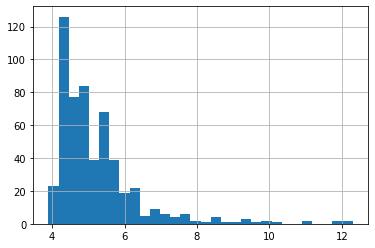

In [18]:
gw1_v1_player_predictions['next_match_value'].hist(bins=30)

In [19]:
gw1_v1_player_predictions[gw1_v1_player_predictions['next_match_value'] < 4.1].shape

(22, 15)

In [20]:
gw1_v1_player_predictions['low_value_player'] = np.where(
    gw1_v1_player_predictions['next_match_value'] < 4.1,
    1,
    0
)

In [21]:
gw1_v1_player_predictions.head()

,name,GW_plus_1,GW_plus_2,GW_plus_3,GW_plus_4,GW_plus_5,position_DEF,position_FWD,position_GK,position_MID,team_name,next_match_value,predictions,in_gw_1_team,in_top_3,low_value_player
0,kevin_de_bruyne,5.267617,5.076207,5.068204,4.990434,4.831463,0,0,0,1,Manchester City,10.3,25.233924,1.0,1.0,0
1,sadio_mané,5.157949,4.955839,4.939997,4.857856,4.702377,0,0,0,1,Liverpool,12.3,24.614018,0.0,1.0,0
2,raheem_sterling,5.010264,4.829712,4.822919,4.749531,4.598156,0,0,0,1,Manchester City,11.9,24.010582,1.0,1.0,0
3,jamie_vardy,4.583392,4.411679,4.402038,4.332379,4.193875,0,1,0,0,Leicester City,10.0,21.923364,1.0,0.0,0
4,heung_min_son,4.474289,4.292636,4.275721,4.201514,4.067049,0,0,0,1,Tottenham Hotspur,9.8,21.311209,0.0,0.0,0


In [22]:
budget = gw1_v1_player_predictions[gw1_v1_player_predictions['in_gw_1_team'] == 1]['next_match_value'].sum()
budget = budget + 0.9
budget

100.4

In [23]:
#budget = 98.8
#budget

## Pick team

In [24]:
from pulp import *

In [25]:
gw1_v1_player_predictions['name'] = gw1_v1_player_predictions['name'].str.replace(' ', '_')
gw1_v1_player_predictions['name'] = gw1_v1_player_predictions['name'].str.replace('-', '_')

In [26]:
team_names = gw1_v1_player_predictions['team_name'].unique()
gw1_v1_player_predictions = pd.get_dummies(gw1_v1_player_predictions, columns=['team_name'])
gw1_v1_player_predictions.head()

,name,GW_plus_1,GW_plus_2,GW_plus_3,GW_plus_4,GW_plus_5,position_DEF,position_FWD,position_GK,position_MID,...,team_name_Manchester City,team_name_Manchester United,team_name_Newcastle United,team_name_Norwich,team_name_Sheffield Utd,team_name_Southampton,team_name_Tottenham Hotspur,team_name_Watford,team_name_West Ham United,team_name_Wolverhampton Wanderers
0,kevin_de_bruyne,5.267617,5.076207,5.068204,4.990434,4.831463,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,sadio_mané,5.157949,4.955839,4.939997,4.857856,4.702377,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,raheem_sterling,5.010264,4.829712,4.822919,4.749531,4.598156,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,jamie_vardy,4.583392,4.411679,4.402038,4.332379,4.193875,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,heung_min_son,4.474289,4.292636,4.275721,4.201514,4.067049,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [27]:
players = list(gw1_v1_player_predictions['name'])

In [28]:
team_dict = {}

for team in team_names:
    team_dict[team] = dict(
        zip(
            gw1_v1_player_predictions['name'],
            gw1_v1_player_predictions[f'team_name_{team}']
        )
    
    )

In [29]:
costs = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['next_match_value']
    )
)

In [30]:
predictions = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['predictions']
    )
)

In [31]:
DEF_flag = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['position_DEF']
    )
)

FWD_flag = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['position_FWD']
    )
)

GK_flag = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['position_GK']
    )
)

MID_flag = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['position_MID']
    )
)

In [32]:
GW1_team = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['in_gw_1_team']
    )
)

In [33]:
in_top_3 = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['in_top_3']
    )
)

In [34]:
low_value_flag = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['low_value_player']
    )
)

In [35]:
prob = LpProblem('FPL team selection', LpMaximize)

In [36]:
player_vars = LpVariable.dicts('player', players, 0, 1, LpInteger)

In [37]:
# Objective function:
prob += lpSum([predictions[p] * player_vars[p] for p in players]), "Total predicted points"

## TODO: Need to work out what deduction is made on sales
Currently have to add 0.1 to budget constraint so that same team is selected

In [38]:
# Constraints
prob += lpSum([costs[p] * player_vars[p] for p in players]) <= budget, "Total cost less than X"

#prob += lpSum([costs[p] * player_vars[p] for p in players]) >= (budget - 0.4), "Total cost greater than X"

prob += lpSum(player_vars[p] for p in players) == 15, "Select 15 players"

prob += lpSum(DEF_flag[p] * player_vars[p] for p in players) == 5, "5 defenders"

prob += lpSum(GK_flag[p] * player_vars[p] for p in players) == 2, "2 goalkeepers"

prob += lpSum(MID_flag[p] * player_vars[p] for p in players) == 5, "5 midfielders"

prob += lpSum(FWD_flag[p] * player_vars[p] for p in players) == 3, "3 forwards"

#prob += lpSum(in_top_3[p] * player_vars[p] for p in players) == 3, "Top 3 must be included"

prob += lpSum(low_value_flag[p] * player_vars[p] for p in players) == 1, "Include 1 low value player"

prob += lpSum(GW1_team[p] * player_vars[p] for p in players) >= 14, "at least X from original team i.e. max (15-X) transfers allowed"

for team in team_dict.keys():
    prob += lpSum(team_dict[team][p] * player_vars[p] for p in players) <= 3, f"Max 3 players in the same {team}"

In [39]:
prob.solve()

1

In [40]:
chosen_players = []
for v in prob.variables():
    if v.varValue == 0:
        continue
    else:
        print(v.name, "=", v.varValue)
        chosen_players.append(v.name.replace('player_', ''))

player_andrew_robertson = 1.0
player_danny_ings = 1.0
player_david_button = 1.0
player_diego_rico = 1.0
player_jamie_vardy = 1.0
player_john_lundstram = 1.0
player_john_mcginn = 1.0
player_kevin_de_bruyne = 1.0
player_lewis_dunk = 1.0
player_mason_mount = 1.0
player_mathew_ryan = 1.0
player_raheem_sterling = 1.0
player_tammy_abraham = 1.0
player_todd_cantwell = 1.0
player_virgil_van_dijk = 1.0


In [41]:
test_selection = gw1_v1_player_predictions[
    gw1_v1_player_predictions['name'].isin(
        chosen_players
    )
]
test_selection

,name,GW_plus_1,GW_plus_2,GW_plus_3,GW_plus_4,GW_plus_5,position_DEF,position_FWD,position_GK,position_MID,...,team_name_Manchester City,team_name_Manchester United,team_name_Newcastle United,team_name_Norwich,team_name_Sheffield Utd,team_name_Southampton,team_name_Tottenham Hotspur,team_name_Watford,team_name_West Ham United,team_name_Wolverhampton Wanderers
0,kevin_de_bruyne,5.267617,5.076207,5.068204,4.990434,4.831463,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,raheem_sterling,5.010264,4.829712,4.822919,4.749531,4.598156,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,jamie_vardy,4.583392,4.411679,4.402038,4.332379,4.193875,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,tammy_abraham,4.237302,4.087371,4.083120,4.021709,3.893450,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13,mason_mount,4.006757,3.860125,3.853586,3.793311,3.672522,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
16,virgil_van_dijk,3.866247,3.717711,3.707895,3.646959,3.530819,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,andrew_robertson,3.722745,3.593012,3.591065,3.537962,3.425374,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,john_lundstram,3.654737,3.522187,3.517596,3.463313,3.353072,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
26,mathew_ryan,3.573220,3.437775,3.430011,3.374459,3.267182,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
33,danny_ings,3.424347,3.276802,3.259717,3.199386,3.097662,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [42]:
test_selection.sum()

name                                 kevin_de_bruyneraheem_sterlingjamie_vardytammy...
GW_plus_1                                                                      54.6884
GW_plus_2                                                                      52.7027
GW_plus_3                                                                      52.6181
GW_plus_4                                                                      51.7926
GW_plus_5                                                                      50.1664
position_DEF                                                                         5
position_FWD                                                                         3
position_GK                                                                          2
position_MID                                                                         5
next_match_value                                                                  99.7
predictions                                

In [43]:
if test_selection.sum()['in_gw_1_team'] == 15:
    print("No transfers made.")
else:
    print(f"{15 - test_selection.sum()['in_gw_1_team']} transfers made.")
    print('\n')
    print(test_selection[test_selection['in_gw_1_team'] == 0]['name'])

1.0 transfers made.


6    tammy_abraham
Name: name, dtype: object


In [44]:
test_selection[test_selection['low_value_player'] == 1]

,name,GW_plus_1,GW_plus_2,GW_plus_3,GW_plus_4,GW_plus_5,position_DEF,position_FWD,position_GK,position_MID,...,team_name_Manchester City,team_name_Manchester United,team_name_Newcastle United,team_name_Norwich,team_name_Sheffield Utd,team_name_Southampton,team_name_Tottenham Hotspur,team_name_Watford,team_name_West Ham United,team_name_Wolverhampton Wanderers
265,david_button,1.175237,1.198278,1.230905,1.233505,1.209144,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Starting 11

In [45]:
# 75% chance of playing
#test_selection.loc[test_selection['name'] == 'todd_cantwell', 'predictions'] = -1

In [46]:
players = list(test_selection['name'])

In [47]:
team_dict = {}

for team in team_names:
    team_dict[team] = dict(
        zip(
            test_selection['name'],
            test_selection[f'team_name_{team}']
        )
    
    )

In [48]:
costs = dict(
    zip(
        test_selection['name'],
        test_selection['next_match_value']
    )
)

In [49]:
predictions = dict(
    zip(
        test_selection['name'],
        test_selection['predictions']
    )
)

In [50]:
DEF_flag = dict(
    zip(
        test_selection['name'],
        test_selection['position_DEF']
    )
)

FWD_flag = dict(
    zip(
        test_selection['name'],
        test_selection['position_FWD']
    )
)

GK_flag = dict(
    zip(
        test_selection['name'],
        test_selection['position_GK']
    )
)

MID_flag = dict(
    zip(
        test_selection['name'],
        test_selection['position_MID']
    )
)

In [51]:
prob = LpProblem('FPL team selection', LpMaximize)

In [52]:
player_vars = LpVariable.dicts('player', players, 0, 1, LpInteger)

In [53]:
# Objective function:
prob += lpSum([predictions[p] * player_vars[p] for p in players]), "Total predicted points"

In [54]:
# Constraints

prob += lpSum(player_vars[p] for p in players) == 11, "Select 11 players"

prob += lpSum(DEF_flag[p] * player_vars[p] for p in players) >= 3, "At least 3 defenders"

prob += lpSum(GK_flag[p] * player_vars[p] for p in players) == 1, "1 goalkeeper"

prob += lpSum(FWD_flag[p] * player_vars[p] for p in players) >= 1, "At least 1 forward"

In [55]:
prob.solve()

1

In [56]:
chosen_players = []
for v in prob.variables():
    if v.varValue == 0:
        continue
    else:
        print(v.name, "=", v.varValue)
        chosen_players.append(v.name.replace('player_', ''))

player_andrew_robertson = 1.0
player_danny_ings = 1.0
player_jamie_vardy = 1.0
player_john_lundstram = 1.0
player_john_mcginn = 1.0
player_kevin_de_bruyne = 1.0
player_mason_mount = 1.0
player_mathew_ryan = 1.0
player_raheem_sterling = 1.0
player_tammy_abraham = 1.0
player_virgil_van_dijk = 1.0


In [57]:
test_selection_11 = gw1_v1_player_predictions[
    gw1_v1_player_predictions['name'].isin(
        chosen_players
    )
]
test_selection_11

,name,GW_plus_1,GW_plus_2,GW_plus_3,GW_plus_4,GW_plus_5,position_DEF,position_FWD,position_GK,position_MID,...,team_name_Manchester City,team_name_Manchester United,team_name_Newcastle United,team_name_Norwich,team_name_Sheffield Utd,team_name_Southampton,team_name_Tottenham Hotspur,team_name_Watford,team_name_West Ham United,team_name_Wolverhampton Wanderers
0,kevin_de_bruyne,5.267617,5.076207,5.068204,4.990434,4.831463,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,raheem_sterling,5.010264,4.829712,4.822919,4.749531,4.598156,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,jamie_vardy,4.583392,4.411679,4.402038,4.332379,4.193875,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,tammy_abraham,4.237302,4.087371,4.083120,4.021709,3.893450,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13,mason_mount,4.006757,3.860125,3.853586,3.793311,3.672522,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
16,virgil_van_dijk,3.866247,3.717711,3.707895,3.646959,3.530819,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,andrew_robertson,3.722745,3.593012,3.591065,3.537962,3.425374,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,john_lundstram,3.654737,3.522187,3.517596,3.463313,3.353072,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
26,mathew_ryan,3.573220,3.437775,3.430011,3.374459,3.267182,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
33,danny_ings,3.424347,3.276802,3.259717,3.199386,3.097662,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [58]:
test_selection_11[test_selection_11['name'] != 'kevin_de_bruyne']['GW_plus_1'].sum() + test_selection_11[test_selection_11['name'] == 'kevin_de_bruyne']['GW_plus_1'].sum() * 2

49.97254490852356

In [59]:
test_selection_11 = test_selection_11.reset_index(drop=True)[['name']]
test_selection_11['starting_11'] = 1
test_selection_11

,name,starting_11
0,kevin_de_bruyne,1
1,raheem_sterling,1
2,jamie_vardy,1
3,tammy_abraham,1
4,mason_mount,1
5,virgil_van_dijk,1
6,andrew_robertson,1
7,john_lundstram,1
8,mathew_ryan,1
9,danny_ings,1


In [60]:
gw_selection_df = test_selection.merge(
    test_selection_11,
    on=['name'],
    how='left'
)
gw_selection_df['starting_11'] = gw_selection_df['starting_11'].fillna(0)
gw_selection_df

,name,GW_plus_1,GW_plus_2,GW_plus_3,GW_plus_4,GW_plus_5,position_DEF,position_FWD,position_GK,position_MID,...,team_name_Manchester United,team_name_Newcastle United,team_name_Norwich,team_name_Sheffield Utd,team_name_Southampton,team_name_Tottenham Hotspur,team_name_Watford,team_name_West Ham United,team_name_Wolverhampton Wanderers,starting_11
0,kevin_de_bruyne,5.267617,5.076207,5.068204,4.990434,4.831463,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1.0
1,raheem_sterling,5.010264,4.829712,4.822919,4.749531,4.598156,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1.0
2,jamie_vardy,4.583392,4.411679,4.402038,4.332379,4.193875,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3,tammy_abraham,4.237302,4.087371,4.083120,4.021709,3.893450,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1.0
4,mason_mount,4.006757,3.860125,3.853586,3.793311,3.672522,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1.0
5,virgil_van_dijk,3.866247,3.717711,3.707895,3.646959,3.530819,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
6,andrew_robertson,3.722745,3.593012,3.591065,3.537962,3.425374,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
7,john_lundstram,3.654737,3.522187,3.517596,3.463313,3.353072,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1.0
8,mathew_ryan,3.573220,3.437775,3.430011,3.374459,3.267182,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1.0
9,danny_ings,3.424347,3.276802,3.259717,3.199386,3.097662,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1.0


In [61]:
gw_selection_df[['name', 'predictions']]

,name,predictions
0,kevin_de_bruyne,25.233924
1,raheem_sterling,24.010582
2,jamie_vardy,21.923364
3,tammy_abraham,20.322952
4,mason_mount,19.186301
5,virgil_van_dijk,18.469632
6,andrew_robertson,17.870158
7,john_lundstram,17.510905
8,mathew_ryan,17.082647
9,danny_ings,16.257914


In [62]:
gw_selection_df.to_parquet(r'data/gw_team_selections/gw16_v2_lstm_team_selections.parquet', index=False)